In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Change Directory
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Tsel_DSA/20_Data_Science_Delivery_I/FraudDetection_v1.2/')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Tsel_DSA/20_Data_Science_Delivery_I/FraudDetection_v1.2'

# **DATA UNDERSTANDING**

### Collect Initial Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
plt.style.use('fivethirtyeight')
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [0]:
df = pd.read_json("/content/drive/My Drive/Colab Notebooks/Tsel_DSA/20_Data_Science_Delivery_I/transactions.txt",lines=True)

In [0]:
#df.to_csv("/content/drive/My Drive/Colab Notebooks/Tsel_DSA/20_Data_Science_Delivery_I/transactions.csv",sep="|")

### Describe Data

In [8]:
df.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False


In [9]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict.sort_values(by='Missing_Val_Pct', ascending=False)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
accountNumber,int64,0,0.0,5000,641914
cardCVV,int64,0,0.0,899,641914
recurringAuthInd,object,0,0.0,1,641914
posOnPremises,object,0,0.0,1,641914
cardPresent,bool,0,0.0,2,641914
merchantZip,object,0,0.0,1,641914
merchantState,object,0,0.0,1,641914
merchantCity,object,0,0.0,1,641914
currentBalance,float64,0,0.0,406990,641914
echoBuffer,object,0,0.0,1,641914


### Explore Data

In [10]:
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False


### Verifiy Data Quality

In [0]:
#Replace whitespace value data with NaN 
df=df.replace(r'^\s*$', np.nan, regex=True)

In [12]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict.sort_values(by='Missing_Val_Pct', ascending=False)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
recurringAuthInd,float64,641914,inf,0,0
posOnPremises,float64,641914,inf,0,0
merchantZip,float64,641914,inf,0,0
merchantState,float64,641914,inf,0,0
merchantCity,float64,641914,inf,0,0
echoBuffer,float64,641914,inf,0,0
acqCountry,object,3913,0.61,4,638001
posEntryMode,object,3345,0.52,5,638569
merchantCountryCode,object,624,0.10,4,641290
transactionType,object,589,0.09,3,641325


# **DATA PREPARATION**

## **Data Cleansing**

### Drop Column with missing values = 100%

In [0]:
df = df.drop(['recurringAuthInd','posOnPremises','merchantZip','merchantState','merchantCity','echoBuffer'], axis='columns')

In [14]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict.sort_values(by='Missing_Val_Pct', ascending=False)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
acqCountry,object,3913,0.61,4,638001
posEntryMode,object,3345,0.52,5,638569
merchantCountryCode,object,624,0.10,4,641290
transactionType,object,589,0.09,3,641325
posConditionCode,object,287,0.04,3,641627
accountNumber,int64,0,0.00,5000,641914
dateOfLastAddressChange,object,0,0.00,2186,641914
cardPresent,bool,0,0.00,2,641914
currentBalance,float64,0,0.00,406990,641914
isFraud,bool,0,0.00,2,641914


### Fill NA values

**acqCountry** & **merchantCountryCode**


In [15]:
df[['acqCountry','merchantCountryCode']].drop_duplicates()

,acqCountry,merchantCountryCode
0,US,US
6,NaN,US
25,PR,PR
36,MEX,MEX
201,NaN,NaN
964,CAN,CAN
15593,CAN,US
35366,NaN,MEX
39411,NaN,CAN
66227,US,MEX


In [0]:
df['acqCountry'] = np.where(df['acqCountry'].isnull(),df['merchantCountryCode'],df['acqCountry'])
df['merchantCountryCode'] = np.where(df['merchantCountryCode'].isnull(),df['acqCountry'],df['merchantCountryCode'])
df['acqCountry'] = df['acqCountry'].fillna('Others')
df['merchantCountryCode'] = df['merchantCountryCode'].fillna('Others')

In [0]:
df = df.drop(['merchantCountryCode'], axis='columns')

**posEntryMode**, **posConditionCode**, and **transactionType**

In [0]:
df['posEntryMode'] = df['posEntryMode'].fillna('Others')
df['posConditionCode'] = df['posConditionCode'].fillna('Others')
df['transactionType'] = df['transactionType'].fillna('Others')

In [19]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict.sort_values(by='Missing_Val_Pct', ascending=False)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
accountNumber,int64,0,0.0,5000,641914
customerId,int64,0,0.0,5000,641914
cardPresent,bool,0,0.0,2,641914
currentBalance,float64,0,0.0,406990,641914
isFraud,bool,0,0.0,2,641914
transactionType,object,0,0.0,4,641914
cardLast4Digits,int64,0,0.0,5134,641914
enteredCVV,int64,0,0.0,980,641914
cardCVV,int64,0,0.0,899,641914
dateOfLastAddressChange,object,0,0.0,2186,641914


### Drop ID Column

In [0]:
df = df.drop(['accountNumber','customerId'], axis='columns')

In [21]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict.sort_values(by='Missing_Val_Pct', ascending=False)

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
creditLimit,int64,0,0.0,10,641914
availableMoney,float64,0,0.0,450690,641914
cardPresent,bool,0,0.0,2,641914
currentBalance,float64,0,0.0,406990,641914
isFraud,bool,0,0.0,2,641914
transactionType,object,0,0.0,4,641914
cardLast4Digits,int64,0,0.0,5134,641914
enteredCVV,int64,0,0.0,980,641914
cardCVV,int64,0,0.0,899,641914
dateOfLastAddressChange,object,0,0.0,2186,641914


In [22]:
df.head(3)

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
1,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False
2,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False


## **Data Formatting**

In [0]:
from datetime import datetime

In [0]:
df['transactionDateTime'] = df['transactionDateTime'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
df['currentExpDate'] = df['currentExpDate'].apply(lambda x:  datetime.strptime(x, '%m/%Y'))
df['accountOpenDate'] = df['accountOpenDate'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%d'))
df['dateOfLastAddressChange'] = df['dateOfLastAddressChange'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%d'))

In [0]:
df = df.astype({'cardCVV':str,'enteredCVV':str,'cardLast4Digits':str})

In [26]:
df.head(3)

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
1,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False
2,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False


## **Feature Engineering**

In [0]:
#Add new column : Length of Stay 
df['LoS'] = (df['transactionDateTime']-df['accountOpenDate']).dt.days

In [0]:
#Add new column to check whether cardCVV == enteredCVV
df['card_vs_enteredCCV'] = df['cardCVV']==df['enteredCVV']

In [0]:
#Add New column : Transaction Time Band([0-6] =1, [6-12] =2, [12-18] =3, [18-00] =4)
df['transactionHour_bin'] = df['transactionDateTime'].dt.hour.apply(lambda x : 1 if ((x>=0) & (x < 6)) else 2 if ((x>=6) & (x < 12)) else 3 if ((x>=12) & (x < 18)) else 4)

In [0]:
 #Add new column : transactionWeekDay
 df['transactionWeekDay'] = df['transactionDateTime'].dt.weekday

In [0]:
 #Add new column : transactionMonthWeek
 df['transactionMonthWeek'] = (df['transactionDateTime'].dt.day - 1) // 7 + 1

In [0]:
#Add new column : Transaction Datetime to Card ExpDate 
df['trx2expdate'] = (df['currentExpDate']-df['transactionDateTime']).dt.days

In [0]:
#Add new column : Transaction Datetime to Card ExpDate 
df['trx2addresschangedate'] = (df['transactionDateTime']-df['dateOfLastAddressChange']).dt.days


In [34]:
df.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,LoS,card_vs_enteredCCV,transactionHour_bin,transactionWeekDay,transactionMonthWeek,trx2expdate,trx2addresschangedate
0,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False,523,True,4,4,2,1544,523
1,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False,524,True,4,5,2,2699,524
2,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False,526,True,3,0,2,4341,526
3,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False,526,True,4,0,2,4981,526
4,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False,531,True,1,5,3,3180,531


### Feature Reformating

In [35]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
creditLimit,int64,0,0.0,10,641914
availableMoney,float64,0,0.0,450690,641914
transactionDateTime,datetime64[ns],0,0.0,635472,641914
transactionAmount,float64,0,0.0,62735,641914
merchantName,object,0,0.0,2493,641914
acqCountry,object,0,0.0,5,641914
posEntryMode,object,0,0.0,6,641914
posConditionCode,object,0,0.0,4,641914
merchantCategoryCode,object,0,0.0,19,641914
currentExpDate,datetime64[ns],0,0.0,165,641914


In [0]:
#Feature Reformatting
#Boolean data type convert to integer
df['isFraud'] = df['isFraud'].apply(lambda x : 1 if x==True else 0)
df['cardPresent'] = df['cardPresent'].apply(lambda x : 1 if x==True else 0)
df['expirationDateKeyInMatch'] = df['expirationDateKeyInMatch'].apply(lambda x : 1 if x==True else 0)
df['card_vs_enteredCCV'] = df['card_vs_enteredCCV'].apply(lambda x : 1 if x==True else 0)

In [37]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
creditLimit,int64,0,0.0,10,641914
availableMoney,float64,0,0.0,450690,641914
transactionDateTime,datetime64[ns],0,0.0,635472,641914
transactionAmount,float64,0,0.0,62735,641914
merchantName,object,0,0.0,2493,641914
acqCountry,object,0,0.0,5,641914
posEntryMode,object,0,0.0,6,641914
posConditionCode,object,0,0.0,4,641914
merchantCategoryCode,object,0,0.0,19,641914
currentExpDate,datetime64[ns],0,0.0,165,641914


In [0]:
#Drop datetime data type column
df = df.drop(['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange'], axis='columns')

In [39]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
creditLimit,int64,0,0.0,10,641914
availableMoney,float64,0,0.0,450690,641914
transactionAmount,float64,0,0.0,62735,641914
merchantName,object,0,0.0,2493,641914
acqCountry,object,0,0.0,5,641914
posEntryMode,object,0,0.0,6,641914
posConditionCode,object,0,0.0,4,641914
merchantCategoryCode,object,0,0.0,19,641914
cardCVV,object,0,0.0,899,641914
enteredCVV,object,0,0.0,980,641914


### Target Exploration

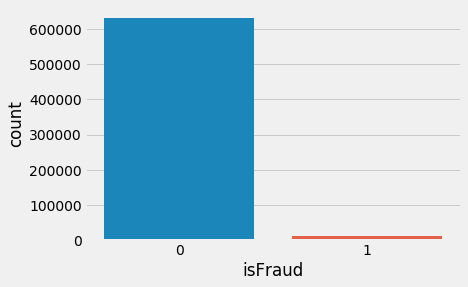

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(df['isFraud'])
plt.show()

In [41]:
df['isFraud'].value_counts().to_frame()

,isFraud
0,630612
1,11302


### Feature to Target Exploration

In [42]:
df.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'merchantName',
       'acqCountry', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'isFraud', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'LoS', 'card_vs_enteredCCV',
       'transactionHour_bin', 'transactionWeekDay', 'transactionMonthWeek',
       'trx2expdate', 'trx2addresschangedate'],
      dtype='object')

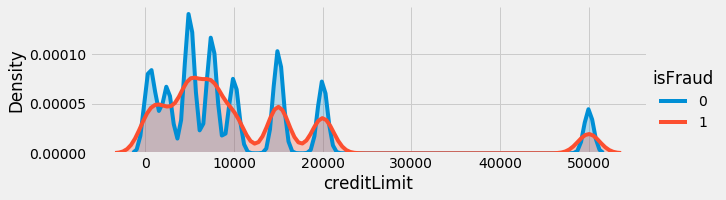

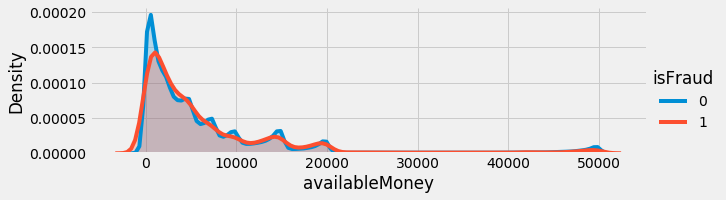

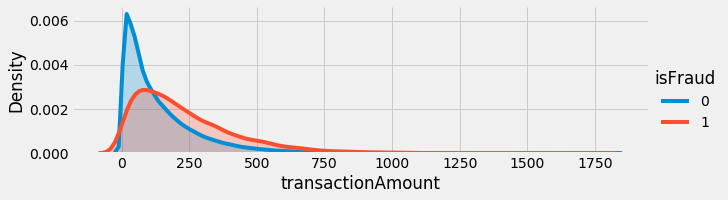

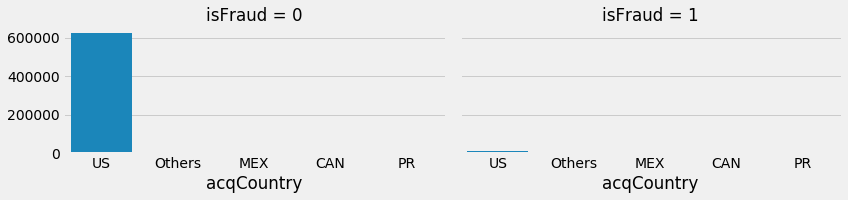

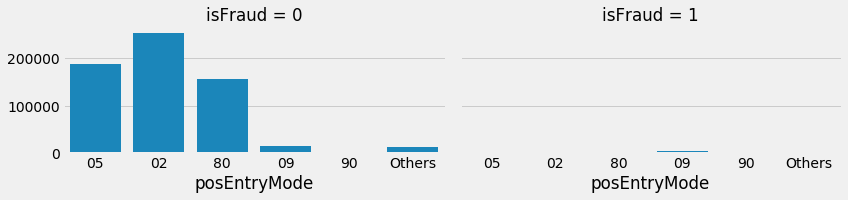

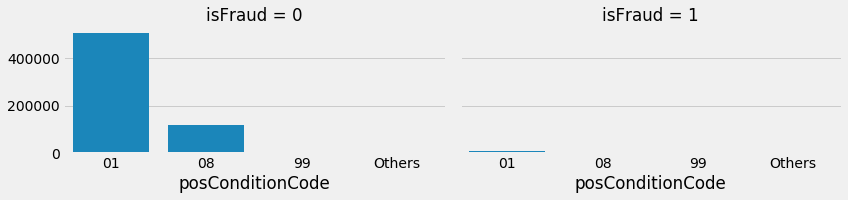

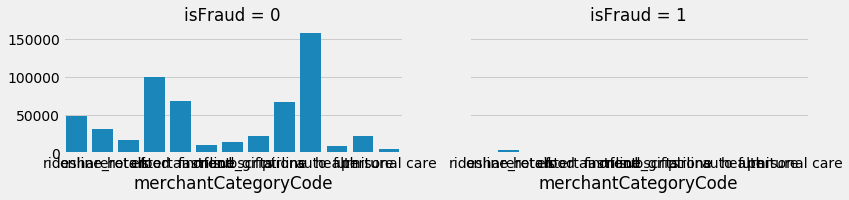

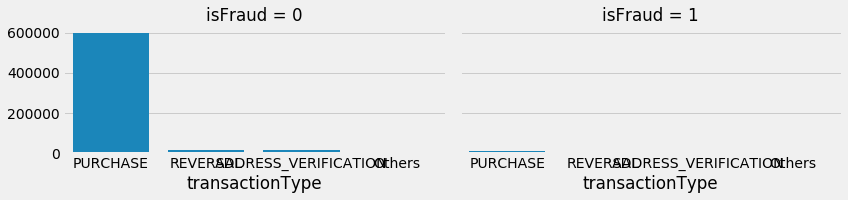

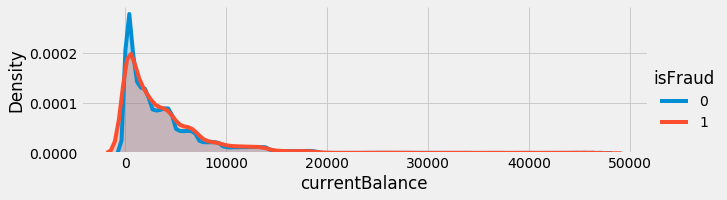

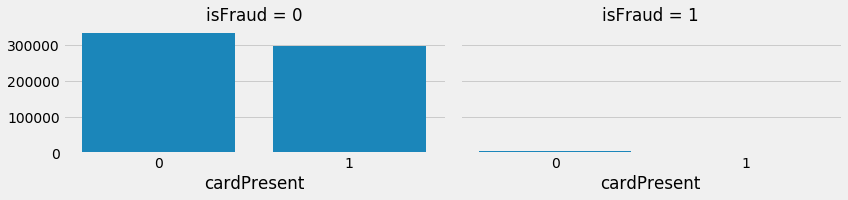

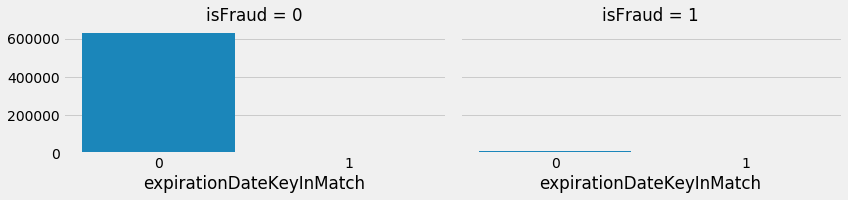

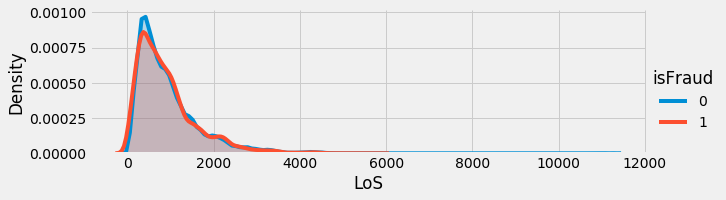

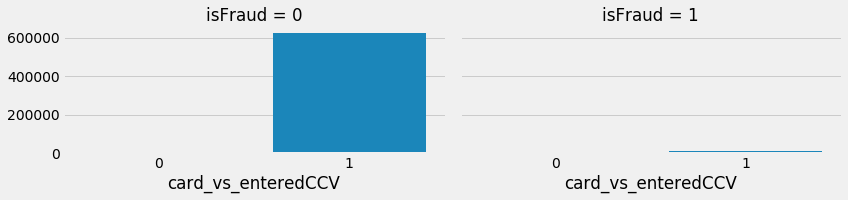

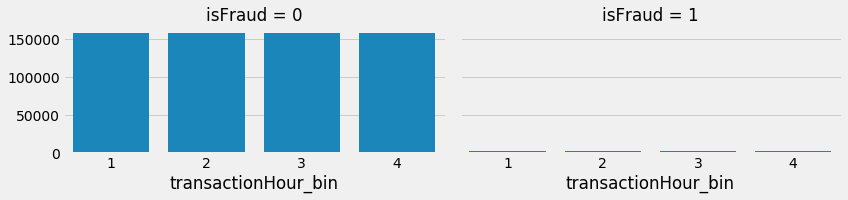

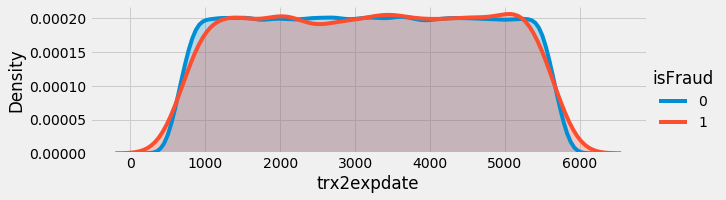

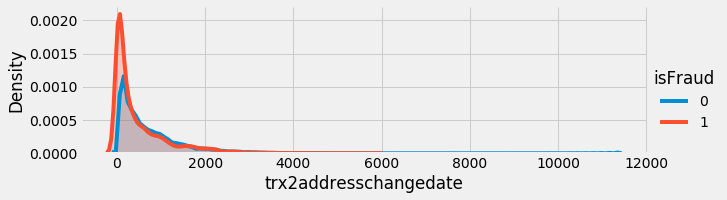

In [43]:
cols = ['creditLimit', 'availableMoney', 'transactionAmount', 
       'acqCountry', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'LoS', 'card_vs_enteredCCV',
       'transactionHour_bin' , 
       'trx2expdate', 'trx2addresschangedate']
#plt.figure(figsize = (8,8))

for counter,col in enumerate(cols):
      num_level = df[col].nunique()
      if  df[col].dtypes!='O' :
        if (num_level >4):
          g = sns.FacetGrid(df, hue='isFraud',height=3, aspect=3)
          g = g.map(sns.kdeplot, col, shade=True)
          g.add_legend(title="isFraud")
          g.set_ylabels("Density")
          #g.fig.suptitle("Distribution of "+col)
          g.fig.show()
        else:
          g = sns.FacetGrid(df, col='isFraud',height=3, aspect=2)
          g = g.map_dataframe(sns.countplot, col)
      else :
        g = sns.FacetGrid(df, col='isFraud',height=3, aspect=2)
        g = g.map_dataframe(sns.countplot, col)

### **Feature Selection**

In [44]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
creditLimit,int64,0,0.0,10,641914
availableMoney,float64,0,0.0,450690,641914
transactionAmount,float64,0,0.0,62735,641914
merchantName,object,0,0.0,2493,641914
acqCountry,object,0,0.0,5,641914
posEntryMode,object,0,0.0,6,641914
posConditionCode,object,0,0.0,4,641914
merchantCategoryCode,object,0,0.0,19,641914
cardCVV,object,0,0.0,899,641914
enteredCVV,object,0,0.0,980,641914


#### Drop Unused features

In [0]:
df = df.drop(['merchantName','cardCVV','enteredCVV','cardLast4Digits'], axis='columns')

In [46]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
creditLimit,int64,0,0.0,10,641914
availableMoney,float64,0,0.0,450690,641914
transactionAmount,float64,0,0.0,62735,641914
acqCountry,object,0,0.0,5,641914
posEntryMode,object,0,0.0,6,641914
posConditionCode,object,0,0.0,4,641914
merchantCategoryCode,object,0,0.0,19,641914
transactionType,object,0,0.0,4,641914
isFraud,int64,0,0.0,2,641914
currentBalance,float64,0,0.0,406990,641914


### One Hot Encoding

In [0]:
from sklearn.preprocessing import OneHotEncoder
df_object = df.select_dtypes('O')
enc = OneHotEncoder()
enc.fit(df_object)
df_object_transformed = enc.transform(df_object)
OHE_df = pd.DataFrame(df_object_transformed.toarray(),columns = enc.get_feature_names(df_object.columns))

#Save encoder to pickle
import pickle
filename = 'OHE_object_features.pkl'
pickle.dump(enc, open(filename, 'wb'))

#Save column name of input encoder to pickle
import pickle
filename = 'OHE_input_columns.pkl'
pickle.dump(df_object.columns, open(filename, 'wb'))


#enc_load = joblib.load("OHE_merchantCountryCode.pkl")

In [0]:
df = df.reset_index().drop(['index'], axis='columns')

In [0]:
#Combine df with OHE output
df = pd.concat([df,OHE_df], axis=1)

In [0]:
#Drop features original object features
df = df.drop(df_object.columns, axis='columns')

In [51]:
#Show Data Profile
Data_dict = pd.DataFrame(df.dtypes)
Data_dict = Data_dict.rename(columns={0:'Data_Type'})
Data_dict['Missing_Value'] = df.isnull().sum()
Data_dict['Missing_Val_Pct'] = round((df.isnull().sum()/df.count())*100,2)
Data_dict['Unique_Value'] = df.nunique()
Data_dict['Count'] = df.count()
Data_dict

,Data_Type,Missing_Value,Missing_Val_Pct,Unique_Value,Count
creditLimit,int64,0,0.0,10,641914
availableMoney,float64,0,0.0,450690,641914
transactionAmount,float64,0,0.0,62735,641914
isFraud,int64,0,0.0,2,641914
currentBalance,float64,0,0.0,406990,641914
cardPresent,int64,0,0.0,2,641914
expirationDateKeyInMatch,int64,0,0.0,2,641914
LoS,int64,0,0.0,4874,641914
card_vs_enteredCCV,int64,0,0.0,2,641914
transactionHour_bin,int64,0,0.0,4,641914


In [52]:
df.shape

(641914, 52)

# **MODELING**

In [0]:
X= df.drop(['isFraud'],axis='columns')
y= df['isFraud']

### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [55]:
print('Size of X_train :',X_train.shape)
print('Size of X_test :',X_test.shape)

Size of X_train : (449339, 51)
Size of X_test : (192575, 51)


## Handling Imbalance

### Under Sampling

In [0]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
rus.fit(X_train ,y_train)
X_train_rus,y_train_rus = rus.fit_resample(X_train,y_train)
X_train_rus = pd.DataFrame(X_train_rus,columns = X_train.columns)

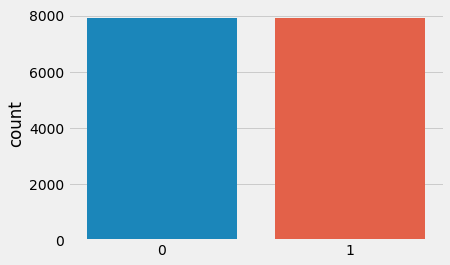

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(y_train_rus)
plt.show()

### Over Sampling

In [0]:
from imblearn.over_sampling import SMOTE 
oversamp = SMOTE(random_state=42)
X_train_oversamp, y_train_oversamp = oversamp.fit_resample(X_train, y_train)
X_train_oversamp = pd.DataFrame(X_train_oversamp,columns = X_train.columns)

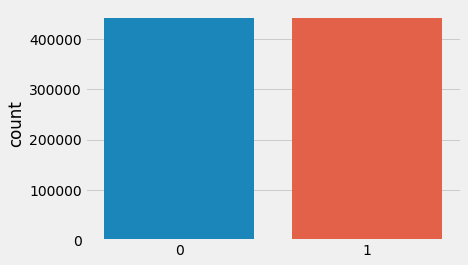

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(y_train_oversamp)
plt.show()

### Combine (Under/Over) Sampling

In [0]:
from imblearn.combine  import SMOTEENN  
combsamp = SMOTEENN(random_state=42)
X_train_combsamp, y_train_combsamp = combsamp.fit_resample(X_train, y_train)
X_train_combsamp = pd.DataFrame(X_train_combsamp,columns = X_train.columns)

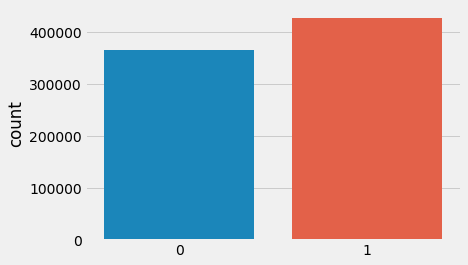

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(y_train_combsamp)
plt.show()

## Model Fitting

### Model Selection

In [0]:
def modeling(X_train,y_train,X_test,y_test):
    #############################################
    #Linear Model
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    #Ensemble
    from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
    #XGBOOST
    from xgboost import XGBClassifier
    #################################################
    
    #linear Model
    logreg = LogisticRegression(random_state = 123)
    # Tree
    dt = DecisionTreeClassifier(random_state=123)
    #Ensemble
    randomforest = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gdc = GradientBoostingClassifier()
    bagging = BaggingClassifier()
    xgb= XGBClassifier()
    
    classifiers = [logreg,dt,randomforest,bagging,ada,gdc, xgb]
    for clf, label in zip(classifiers, 
                      ['Logistic Regression',
                       'Decision Tree',
                       'Random Forest',
                       'Bagging',
                       'AdaBoost',
                       'GradBoost',
                      'XGBoost']):

        clf.fit(X_train,y_train)
        y_proba_pred = clf.predict_proba(X_test)[:,1]
        score = roc_auc_score(y_test,y_proba_pred)
        print("AUC of ROC : %0.4f  [%s]" 
              % (score, label))

In [82]:
from sklearn.metrics import roc_auc_score
# Modeling using Under Sampling
modeling(X_train_rus,y_train_rus,X_test,y_test)

AUC of ROC : 0.6859  [Logistic Regression]
AUC of ROC : 0.6023  [Decision Tree]
AUC of ROC : 0.7649  [Random Forest]
AUC of ROC : 0.7149  [Bagging]
AUC of ROC : 0.7540  [AdaBoost]
AUC of ROC : 0.7611  [GradBoost]
AUC of ROC : 0.7600  [XGBoost]


In [83]:
# Modeling using Over Sampling
modeling(X_train_oversamp,y_train_oversamp,X_test,y_test)

AUC of ROC : 0.6644  [Logistic Regression]
AUC of ROC : 0.5301  [Decision Tree]
AUC of ROC : 0.7200  [Random Forest]
AUC of ROC : 0.6022  [Bagging]
AUC of ROC : 0.6919  [AdaBoost]
AUC of ROC : 0.7219  [GradBoost]
AUC of ROC : 0.7241  [XGBoost]


In [84]:
# Modeling using Combine (Under/Over) Sampling
modeling(X_train_combsamp,y_train_combsamp,X_test,y_test)

AUC of ROC : 0.7045  [Logistic Regression]
AUC of ROC : 0.5338  [Decision Tree]
AUC of ROC : 0.7330  [Random Forest]
AUC of ROC : 0.6190  [Bagging]
AUC of ROC : 0.6860  [AdaBoost]
AUC of ROC : 0.7245  [GradBoost]
AUC of ROC : 0.7266  [XGBoost]


### Save column name to pickle

In [0]:
#Save column name to pickle
model_columns = list(X_train_rus.columns)
import pickle
column_filename = 'model_input_columns.pkl'
pickle.dump(model_columns, open(column_filename, 'wb'))

### Fitting

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_rus,y_train_rus)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Save model to pickle

In [0]:
filename = 'xgb_pickle.pkl'
pickle.dump(xgb, open(filename, 'wb'))

## Prediction

In [0]:
y_pred = xgb.predict(X_test)

# **EVALUATION**

In [0]:
y_pred = xgb.predict(X_test)
y_proba_pred = xgb.predict_proba(X_test)[:,1]

### Feature Importance

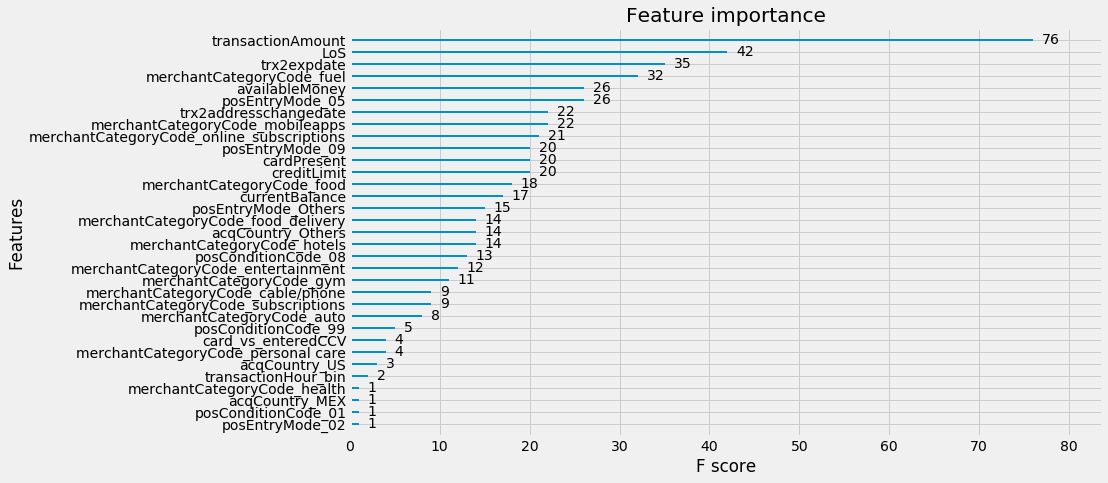

In [67]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,7))
plot_importance(xgb, ax=ax) # top 10 most important features
plt.show()

### Confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,128135,61054
1,1010,2376


### ROC AUC Score

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba_pred)

0.759540045549665

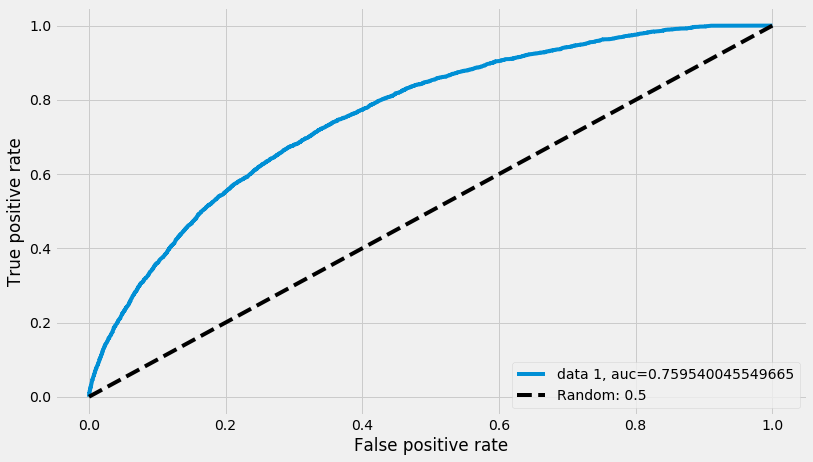

In [70]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba_pred)
auc = metrics.roc_auc_score(y_test, y_proba_pred)
plt.subplots(figsize=(12,7))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

### Classification report

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81    189189
           1       0.04      0.70      0.07      3386

    accuracy                           0.68    192575
   macro avg       0.51      0.69      0.44    192575
weighted avg       0.98      0.68      0.79    192575



# **DEPLOYMENT** (request-response data test)

In [0]:
from sklearn.externals import joblib
import traceback
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [0]:
dfu = pd.read_json("/content/drive/My Drive/Colab Notebooks/Tsel_DSA/20_Data_Science_Delivery_I/transactions.txt",lines=True)

In [0]:
dfu = dfu.drop(['isFraud'],axis='columns')
dfu = dfu.head(10)

In [0]:
OHE_columns = joblib.load("OHE_input_columns.pkl")
OHE = joblib.load("OHE_object_features.pkl")
model_columns = joblib.load("model_input_columns.pkl")
model = joblib.load("xgb_pickle.pkl")

In [76]:
dfu =dfu.replace(r'^\s*$', np.nan, regex=True)
dfu = dfu.drop(['recurringAuthInd','posOnPremises','merchantZip','merchantState','merchantCity','echoBuffer'], axis='columns')
dfu['acqCountry'] = dfu['acqCountry'].fillna('Others')
dfu['merchantCountryCode'] = dfu['merchantCountryCode'].fillna('Others')
dfu = dfu.drop(['merchantCountryCode'], axis='columns')
dfu['posEntryMode'] = dfu['posEntryMode'].fillna('Others')
dfu['posConditionCode'] = dfu['posConditionCode'].fillna('Others')
dfu['transactionType'] = dfu['transactionType'].fillna('Others')
dfu = dfu.drop(['accountNumber','customerId'], axis='columns')
dfu['transactionDateTime'] = dfu['transactionDateTime'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
dfu['currentExpDate'] = dfu['currentExpDate'].apply(lambda x:  datetime.strptime(x, '%m/%Y'))
dfu['accountOpenDate'] = dfu['accountOpenDate'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%d'))
dfu['dateOfLastAddressChange'] = dfu['dateOfLastAddressChange'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%d'))
dfu = dfu.astype({'cardCVV':str,'enteredCVV':str,'cardLast4Digits':str})
dfu['LoS'] = (dfu['transactionDateTime']-dfu['accountOpenDate']).dt.days
dfu['card_vs_enteredCCV'] = dfu['cardCVV']==dfu['enteredCVV']
dfu['transactionHour_bin'] = dfu['transactionDateTime'].dt.hour.apply(lambda x : 1 if ((x>=0) & (x < 6)) else 2 if ((x>=6) & (x < 12)) else 3 if ((x>=12) & (x < 18)) else 4)
dfu['transactionWeekDay'] = dfu['transactionDateTime'].dt.weekday
dfu['transactionMonthWeek'] = (dfu['transactionDateTime'].dt.day - 1) // 7 + 1
dfu['trx2expdate'] = (dfu['currentExpDate']-dfu['transactionDateTime']).dt.days
dfu['trx2addresschangedate'] = (dfu['transactionDateTime']-dfu['dateOfLastAddressChange']).dt.days
dfu['cardPresent'] = dfu['cardPresent'].apply(lambda x : 1 if x==True else 0)
dfu['expirationDateKeyInMatch'] = dfu['expirationDateKeyInMatch'].apply(lambda x : 1 if x==True else 0)
dfu['card_vs_enteredCCV'] = dfu['card_vs_enteredCCV'].apply(lambda x : 1 if x==True else 0)
dfu = dfu.drop(['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange'], axis='columns')
dfu = dfu.drop(['merchantName','cardCVV','enteredCVV','cardLast4Digits'], axis='columns')
dfu_object = dfu.select_dtypes('O')
dfu_object=dfu_object.reindex(columns=OHE_columns, fill_value=0)
dfu_object_transformed = OHE.transform(dfu_object)
OHE_dfu = pd.DataFrame(dfu_object_transformed.toarray(),columns = OHE.get_feature_names(dfu_object.columns))
dfu = dfu.reset_index().drop(['index'], axis='columns')
dfu = pd.concat([dfu,OHE_dfu], axis=1)
dfu = dfu.drop(dfu_object.columns, axis='columns')

dfu

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,LoS,card_vs_enteredCCV,transactionHour_bin,transactionWeekDay,transactionMonthWeek,trx2expdate,trx2addresschangedate,acqCountry_CAN,acqCountry_MEX,acqCountry_Others,acqCountry_PR,acqCountry_US,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posEntryMode_Others,posConditionCode_01,posConditionCode_08,posConditionCode_99,posConditionCode_Others,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_Others,transactionType_PURCHASE,transactionType_REVERSAL
0,5000,5000.00,111.33,0.00,0,0,523,1,4,4,2,1544,523,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5000,4888.67,24.75,111.33,0,0,524,1,4,5,2,2699,524,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5000,4863.92,187.40,136.08,0,0,526,1,3,0,2,4341,526,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,5000,4676.52,227.34,323.48,0,0,526,1,4,0,2,4981,526,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5000,4449.18,0.00,550.82,0,0,531,1,1,5,3,3180,531,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,5000,4449.18,9.80,550.82,0,0,531,1,4,5,3,1842,531,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,5000,4439.38,247.99,560.62,0,0,539,1,2,6,4,3629,539,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,5000,4191.39,0.00,808.61,0,0,541,1,1,1,4,5787,541,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,5000,4191.39,11.54,808.61,1,0,541,1,3,1,4,2987,541,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,5000,4179.85,11.54,820.15,1,0,541,1,3,1,4,2987,541,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
query = dfu.reindex(columns=model_columns, fill_value=0)
y_pred = model.predict(query)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

# **Hyper Parameter Tunning**

### set estimates initial values of parameters

In [0]:
import xgboost as xgboost
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_param = xgb1.get_xgb_params()
xgtrain = xgboost.DMatrix(X_train_rus, label=y_train_rus)
cvresult = xgboost.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=3,
                      metrics='auc', early_stopping_rounds=10, verbose_eval=False)

In [95]:
n_estimators=cvresult.shape[0]
n_estimators
#xgb1.set_params(n_estimators=n_estimators)


111

### Tune **max_depth** and min_child_weight

In [0]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=111, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_rus,y_train_rus)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

0.7654235788741697

In [106]:
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'max_depth': 7, 'min_child_weight': 1}
0.7654235788741697


In [107]:
param_test2 = {
 'max_depth':[6,7,8],
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=111, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_rus,y_train_rus)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'max_depth': 7, 'min_child_weight': 1}
0.7654235788741697


### Tune **Gamma**

In [108]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=111, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train_rus,y_train_rus)
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'gamma': 0.0}
0.7654235788741697


### Tune **subsample** and **colsample_bytree**

In [109]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=111, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train_rus,y_train_rus)
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'colsample_bytree': 0.8, 'subsample': 0.8}
0.7654235788741697


### Tuning **Regularization Alpha**

In [110]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=111, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train_rus,y_train_rus)
print(gsearch5.best_params_)
print(gsearch5.best_score_)

{'reg_alpha': 1e-05}
0.7654235389681723


In [111]:
param_test5a = {
 'reg_alpha':[0, 1e-05, 1e-04, 1e-03]
}
gsearch5a = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=111, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5a, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5a.fit(X_train_rus,y_train_rus)
print(gsearch5a.best_params_)
print(gsearch5a.best_score_)

{'reg_alpha': 0}
0.7654235788741697


### Reducing Learning Rate

In [0]:
import xgboost as xgboost
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=111,
 max_depth=7,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha = 0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_param = xgb1.get_xgb_params()
xgtrain = xgboost.DMatrix(X_train_rus, label=y_train_rus)
cvresult = xgboost.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=3,
                      metrics='auc', early_stopping_rounds=10, verbose_eval=False)

In [113]:
n_estimators=cvresult.shape[0]
n_estimators
#xgb1.set_params(n_estimators=n_estimators)


111

In [114]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=111,
 max_depth=7,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha = 0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_train_rus,y_train_rus)
y_pred = xgb1.predict(X_test)
y_proba_pred = xgb1.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_proba_pred)

0.7565402053419942